# **Notes:**

**Never disconnect / connect optical fiber yourself, let your instructor know (laser safety)**

**Never disconnect /connect power supply / cable yourself, let your instructor know (equipment/person safety)**

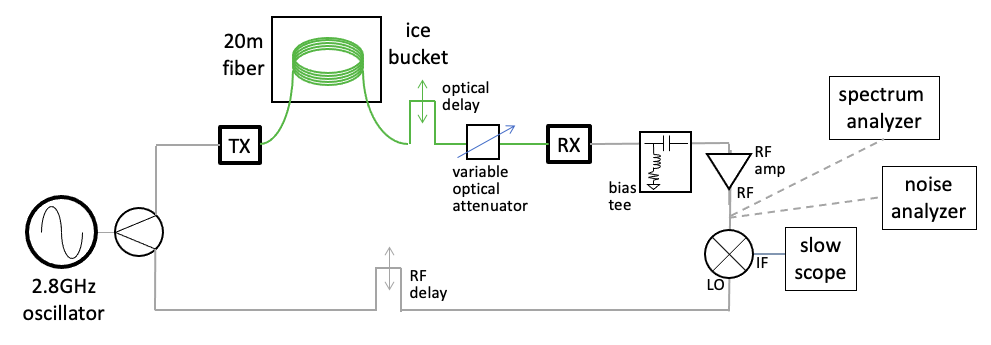

## Goal: Demonstrate transmission of RF over fiber, including thermal perturbation of delay. Also, square law detection and shot noise in photodiode.

**Key elements:**

RF oscillator, RF-over-fiber TX/RX set, transmission fiber with thermal perturbation, optical delay, optical attenuator, RF phase detector

**What is happening:**

An RF frequency source is input to an RF-over-fiber transmitter, causing amplitude modulation at that frequency. The AM signal is transmitted via a fiber optic to the receiver, where the RF is demodulated. This signal is sent to a mixer, where it is phase compared with the original oscillator signal, delayed to provide for detection at quadrature phase (offset by pi/2). The phase delay effect of perturbations to the fiber can be measured, as well as the effect of variation in RF power and optical power. 

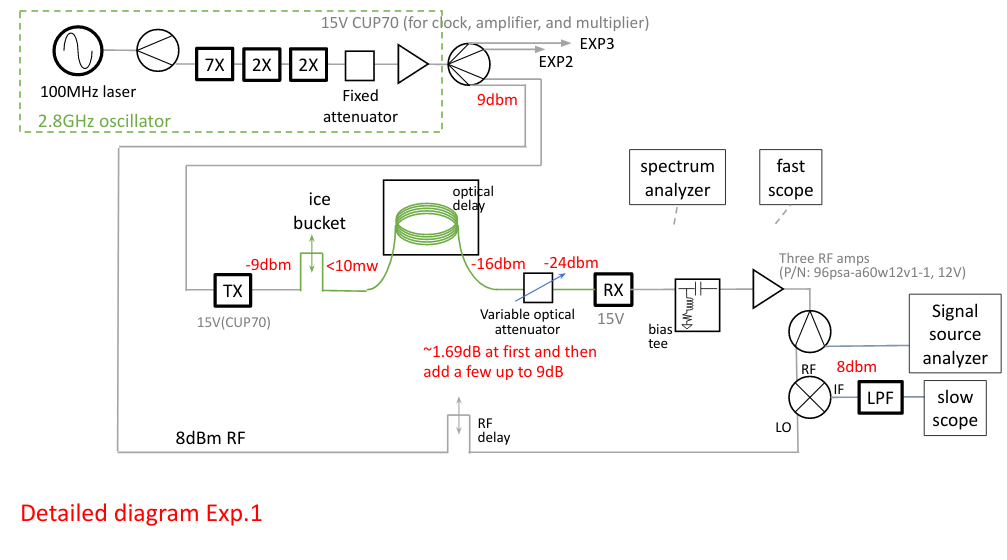

## 1. FINDING DELAY-VERSUS-VOLTAGE CALIBRATION VALUE. 

Make sure the optical attenuator is set to its minimum value. 

Observe the mixer output as the optical delay is varied, noting the marked position of the retroreflector as it varies. (Don’t go beyond he red marks in either direction!) The delay position is marked in picoseconds and millimeters. 

Note that since the delay is double-passed, the delay will be twice what the distance indicates. 



See what happens to the mixer output when the delay goes far enough in both directions to span a full wave. (The RF delay and cables have been selected to put the mixer output at approximately zero with the optical delay in the center of its travel.) 



The IF signal should turn around at both ends, indicating it’s sinusoidally related to the delay. Take delay and voltage data for a few points, and fit a sine function to it to test this. 



Write down especially the voltage values and delay values for the ends, noting that when the signal turns around, the slope is flat and it’s difficult to figure exactly what delay corresponds to a full wave. 



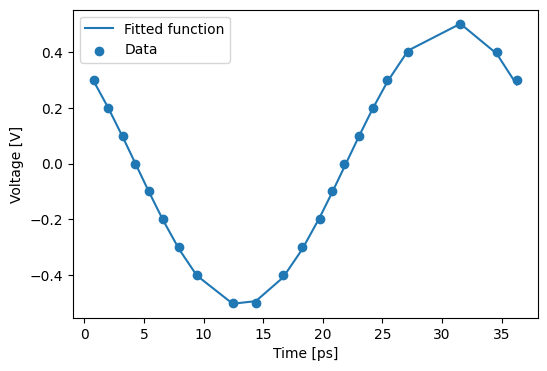

Amplitude: 0.5066374413215469, frequency: -0.17794652855460308, phase: 7.0455486892059005


In [1]:
import numpy as np
import matplotlib.pyplot as plt
#speed of light in air in mm/ps
c = 0.299
V = np.array((3, 4, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -5, -4, -3, -2, -1, 0, 1, 2, 3))*0.1
T = np.array((5.42, 5.17, 4.715, 4.06, 3.80, 3.615, 3.44, 3.25, 3.11, 2.95, 2.73, 2.49, 2.15, 1.86, 1.41, 1.19, 0.99, 0.81, 0.63, 0.48, 0.30, 0.12))*2/c

#plt.plot(T, V, '.')

from scipy import optimize
def test_func(x, a, b, c):
    return a * np.sin(b * x + c)

params, params_covariance = optimize.curve_fit(test_func, T, V,
                                               p0=[0.5, 1/15, np.pi/2])

plt.figure(figsize=(6, 4))
plt.scatter(T, V, label='Data')
plt.plot(T, test_func(T, params[0], params[1], params[2]),
         label='Fitted function')
plt.xlabel('Time [ps]')
plt.ylabel('Voltage [V]')

plt.legend(loc='best')

plt.show()
print('Amplitude: {0}, frequency: {1}, phase: {2}'.format(params[0], params[1], params[2]))

Let’s assume we know that precisely, given the frequency and the fact that the light in the delay goes through air. The point here is to find the voltage extremes. Are the min and max voltages symmetric about zero? If there is distortion of the RF in the transmitter and receiver, they might not be. 



When the mixer output is near zero, find the slope, which should be approximately linear over a small range (“small-angle approximation”). This slope is your calibration for further measurements, which will be made near this point. 

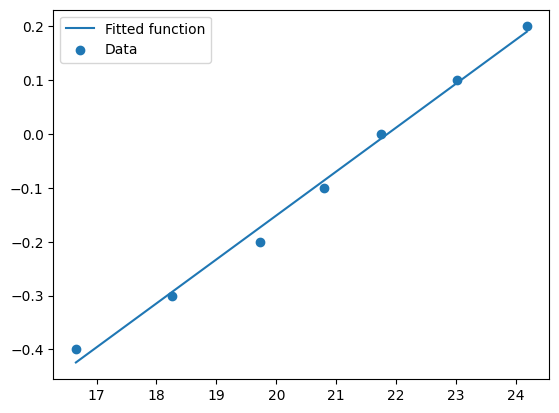

slope: 0.08163701430715992, y-intercept: -1.7838365540564236


In [2]:
V_line = V[5:12]
T_line = T[5:12]

def test_func(x, a, b):
    return a * x + b

params, params_covariance = optimize.curve_fit(test_func, T_line, V_line,
                                               p0=[1, 0.])

slope_room = params

plt.figure()
plt.scatter(T_line, V_line, label='Data')
plt.plot(T_line, test_func(T_line, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()
print('slope: {0}, y-intercept: {1}'.format(params[0], params[1]))

## 2. AMPLITUDE SENSITIVITY OF MIXER. 

Vary the optical attenuator while watching the mixer output. 

Does it affect the mixer output voltage when near zero? 



Yes, it changes the bias since the amplitudes of the waves are no longer the same. Even if the waves are 180 degrees out of phase, 3.32 mm, the amplitudes don't exactly cancel. 

What about at an offset from zero (caused by changing the delay)? 



The voltage output is still descreased since one of the mixed signals is being reduced. 

If the zero point changes, vary the delay until zero volts is again reached. 

How much delay is needed to compensate for how much attenuation? 



In [3]:
D = np.array((3.36, 3.41, 3.44, 3.47, 3.48, 3.59, 3.69, 3.80))*2/c
A = np.array((0, 1, 2, 3, 4, 10, 12, 15))

At different attenuation values, what is the voltage-versus-delay slope? (As of this writing, I’ve not tried this myself. The idea is that a simple mixer is sensitive to both phase and amplitude changes in the signals, thus variation in output voltage may not be due to RF delay changes only. Certainly, cutting the optical signal to zero will result in zero mixer output.) 


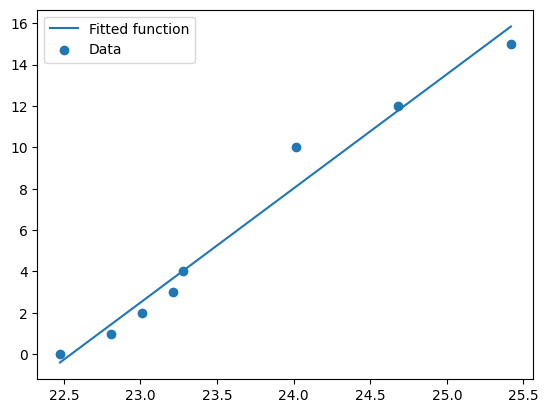

slope: 5.517261870758005, y-intercept: -124.39880872090806


In [4]:
params, params_covariance = optimize.curve_fit(test_func, D, A,
                                               p0=[1, 0.])

plt.figure()
plt.scatter(D, A, label='Data')
plt.plot(D, test_func(D, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()
print('slope: {0}, y-intercept: {1}'.format(params[0], params[1]))

**Return the optical delay back to the minimum loss value for the next experiments.**

## 3. FINDING FIBER THERMAL DELAY COEFFICIENT. 

On the scope, decrease voltage scale to see small variations, and set optical delay (or RF delay, if you want to try that, but calibrating this is not easy, so we usually leave it alone) to make mixer output voltage zero. 

Touch the 20m fiber bundle, bend it, squeeze it, observing the effect on the mixer. 



Answer: It increased the voltage since the thermal energy increased within the optical fiber.

For a quantitative perturbation, grab the side with the fiber connectors, set the signal back to zero using one of the delays, and immerse half of the fiber bundle in ice water. Don’t get water on the connectors. Hold it there for a couple of minutes, until the mixer voltage value approaches a limit, and write that down. 



Answer: -300 mV

The temperature excursion will be room temperature (23 degrees? Is there a thermometer around?) down to zero Celsius. 

Using your calibration of the voltage-versus-delay, figure the delay induced by this temperature change. 




In [5]:
slope = slope_room[0] #units: V/picosecond
time = (0.3)/slope
print(time)
distance = time*c/2
print('One way Distance: ', distance)

3.674803672648385
One way Distance:  0.5493831490609336


Given that 20m of fiber is half-dunked in water, call it 10m of fiber that’s been cooled. Calculate the fiber’s coefficient of delay versus temperature. 



In [6]:
deltaT = 23 - 0 #Units: C
length = 10000 #unite: meters
coeff_delay = distance/(deltaT*length) #units: ps/(C*m)
print('Delay Coefficient: {0} /(C)'.format(coeff_delay))

Delay Coefficient: 2.3886223872214503e-06 /(C)


Is this approximately the standard value (8e-6/degree C)? Note that the units are fractional delay change per degree. 

Yes it is close enough

## 4. PHOTODIODE SQUARE LAW. 

Observe the RF before the mixer (using the split port for this) on the spectrum analyzer. 

Finding the peak at 2800MHz, set a marker on the peak to display the power. 



Vary the optical attenuator, in 3dB steps, and record the power measurements until the signal is almost gone. 



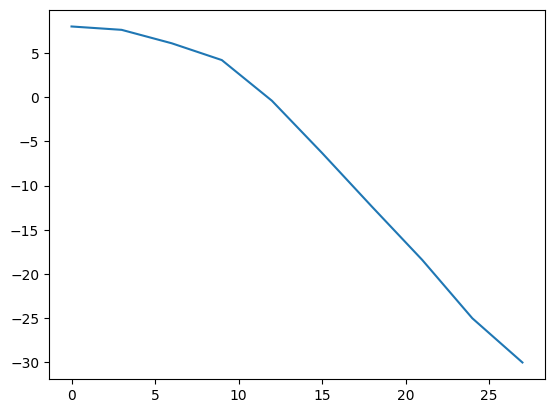

In [15]:
A = np.array((8.0, 7.62, 6.1, 4.2, -0.4, -6.3, -12.4, -18.4, -25, -30))
dB = np.arange(0, A.shape[0]*3, 3)
plt.plot(dB, A)

What is the change in dBm versus optical attenuation? The photodiode current is proportional to optical power, and the RF power is proportional to current squared, remember. 

In [25]:
for i in range(A.shape[0] - 1):
    y_slope = A[i + 1] - A[i]
    print('Derivative at {0} dB: {1}'.format(dB[i], y_slope/3))
    
print('In the linear region, the slope is about -2 dBm/dB of attenuation for the 2.8 GHz signal')

Derivative at 0 dB: -0.12666666666666662
Derivative at 3 dB: -0.5066666666666668
Derivative at 6 dB: -0.6333333333333332
Derivative at 9 dB: -1.5333333333333334
Derivative at 12 dB: -1.9666666666666666
Derivative at 15 dB: -2.0333333333333337
Derivative at 18 dB: -1.9999999999999993
Derivative at 21 dB: -2.2000000000000006
Derivative at 24 dB: -1.6666666666666667
In the linear region, the slope is about -2 dBm/dB of attenuation for the 2.8 GHz signal


## 5. SHOT NOISE VERSUS OPTICAL POWER LEVEL. 

With the optical attenuator at minimum, observe the RF before the mixer on the signal source analyzer (which I lazily call “noise analyzer” in the diagram). 



Take single measurements, so that the RF power will be continuously measured as you vary the optical attenuator. Sometimes the analyzer makes a bad measurement, so hold out for ones with smooth curves at high frequency, indicating a good one. 



Vary the optical attenuator in 3dB steps and take analyzer measurements, noting especially the high frequency noise floor. It should increase as the optical power decreases, and be flat. 

The low frequency should be at least 10 or 100Hz, to make the measurements not take a long time, and the high frequency can be 1 or 10 MHz. 

The lowest frequency values jump around, but are largely meaningless because there are too few points to do a stable calculation. 

The analyzer should be set up to give L(f) graphs, as well as integrated RMS values over some frequency range, which should include the high frequencies. 

Save the graphs and RMS values. 



Turn your corresponding RF power measurements into average currents, given that the impedance is 50 Ohms. 



Note that the measurements you’ve been doing are after a lot of amplification in order to have large enough signals to measure, and the actual signal coming from the receiver photodiode starts at less than -20dBm and goes down from there, so the actual current will be much less. The point here is to find the ratio between optical attenuation/RF signal current and rise in shot noise floor. 

Does your data for L(f) shot noise floor versus RF signal current match the expected dependence, which is 1/current? Remember too, the lesson from the previous experiment. 